In [1]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.utils import algorithm_globals
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


/tmp/ipykernel_119/3295844494.py:11: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [2]:
#!pip install qiskit_ibm_provider

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('umap_embeddings_5.csv')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10314 non-null  float64
 1   1       10314 non-null  float64
 2   2       10314 non-null  float64
 3   3       10314 non-null  float64
 4   4       10314 non-null  float64
 5   label   10314 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 483.6 KB


In [9]:
df.head()

,0,1,2,3,4,label
0,9.788079,9.786986,5.798132,3.271540,11.044828,0
1,8.596200,6.203757,7.541268,3.400610,11.646584,0
2,8.941421,5.883195,7.981206,3.561140,11.073158,0
3,9.308008,9.559373,8.342915,3.439551,11.326474,0
4,8.945490,6.774744,7.835735,3.549780,11.791572,0


In [10]:
features = df.iloc[:,0:5]
# features = features.iloc[1:]

print(features)
print(features.info())

               0         1         2         3          4
0       9.788079  9.786986  5.798132  3.271540  11.044828
1       8.596200  6.203757  7.541268  3.400610  11.646584
2       8.941421  5.883195  7.981206  3.561140  11.073158
3       9.308008  9.559373  8.342915  3.439551  11.326474
4       8.945490  6.774744  7.835735  3.549780  11.791572
...          ...       ...       ...       ...        ...
10309  10.122209  8.486302  7.224278  3.890846  10.530403
10310  10.724847  9.762397  6.160814  4.039829  10.917808
10311   8.817484  4.744309  8.077320  4.726676  10.842552
10312  10.632682  9.166457  9.320440  1.789463  10.955692
10313  11.066353  9.492675  5.093371  3.249228  12.489249

[10314 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10314 non-null  float64
 1   1       10314 non-null  float64
 2   2       10314 non

In [11]:
labels = df['label']
print(labels)

0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: label, Length: 10314, dtype: int64


In [12]:
# from sklearn.preprocessing import MinMaxScaler

# features = MinMaxScaler().fit_transform(features)

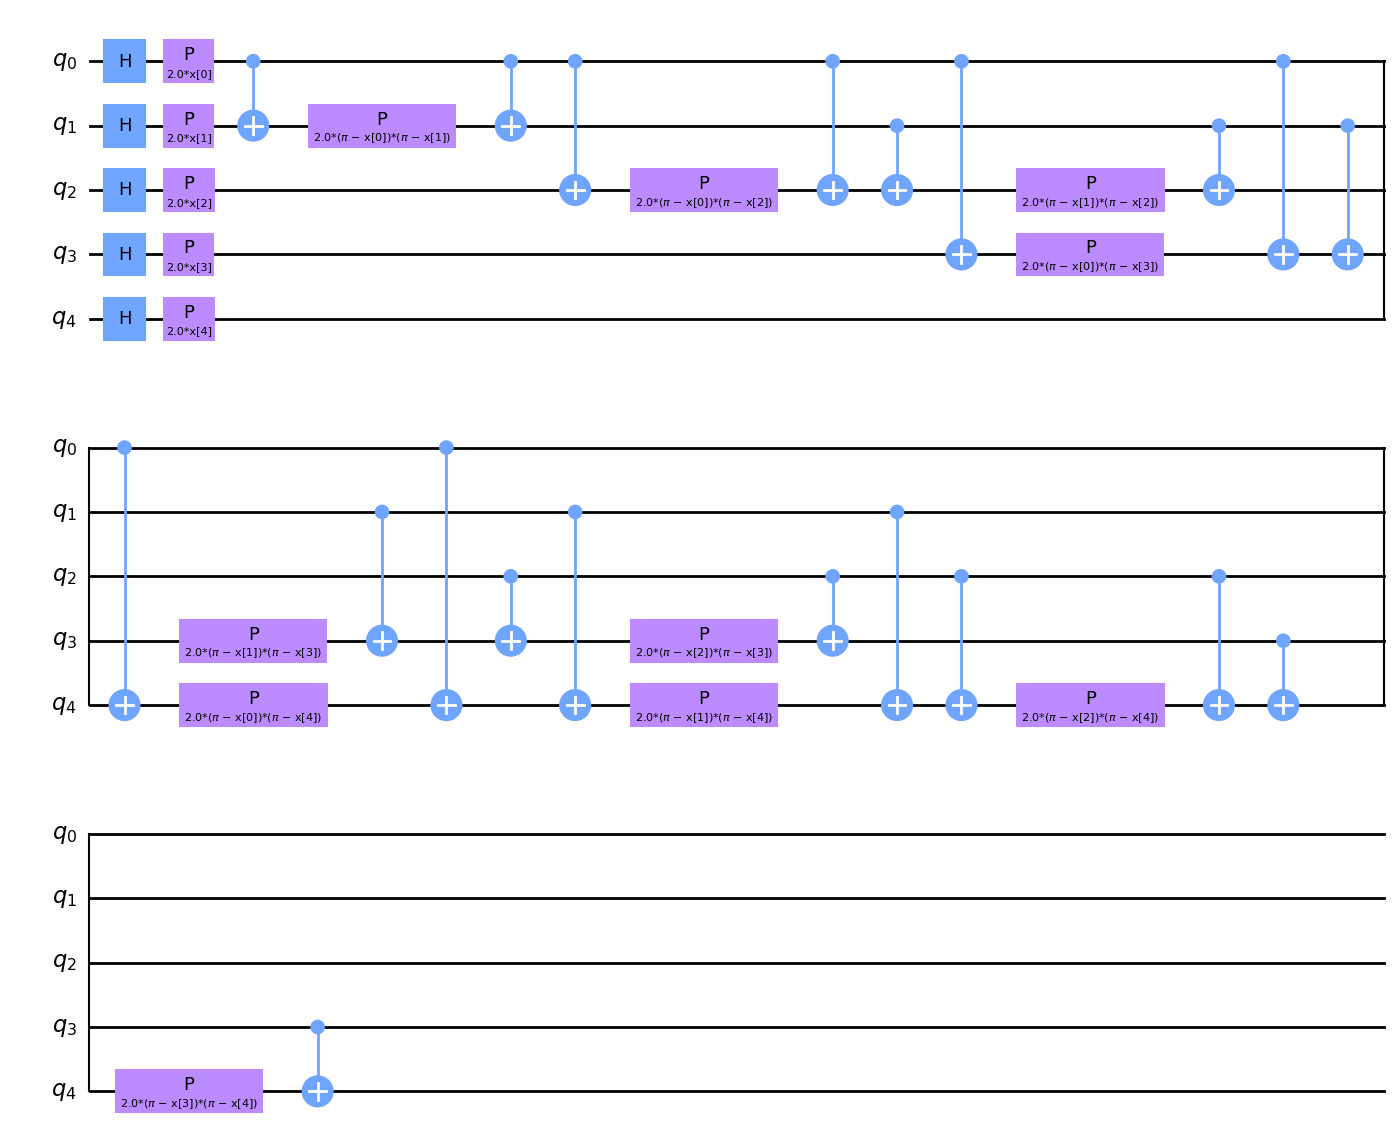

In [13]:

from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=5, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

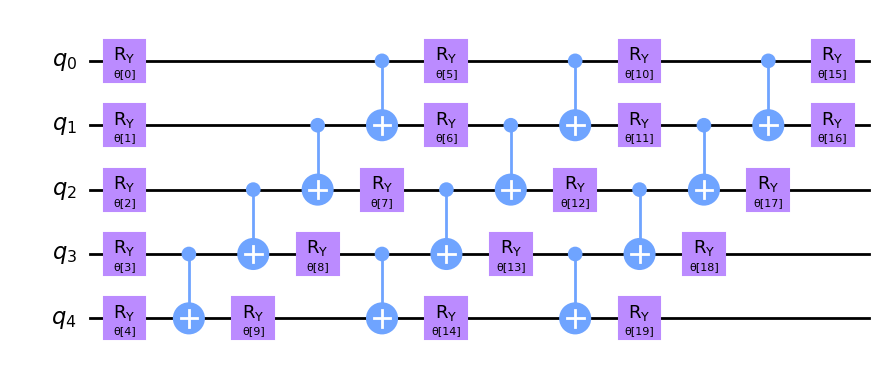

In [14]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [15]:
qc = QuantumCircuit(num_features, num_features)
qc.append(feature_map, range(num_features))
qc.append(ansatz, range(num_features))
qc.measure(range(num_features), range(num_features))

In [16]:
from qiskit.algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.algorithms.optimizers import COBYLA
from qiskit.providers.aer import QasmSimulator
from qiskit.primitives import Sampler
from qiskit.utils import algorithm_globals

In [17]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [18]:
algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [19]:
train_labels = np.array(train_labels)
backend = QasmSimulator()
optimizer = COBYLA(maxiter=5) #set iterations to higher value to get a better result, optimally 100 iterations
sampler = Sampler()
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
    quantum_instance=backend
)
#vqc = VQC(sampler=sampler, feature_map=feature_map, ansatz=ansatz, optimizer=optimizer, callback=callback_graph, quantum_instance=backend)


In [20]:
print(type(train_features))
# print(type(train_labels))
train_labels = np.array(train_labels)
print(type(train_labels))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [21]:
print(train_features)
print(train_labels)

              0          1         2         3          4
2595   9.779274   8.577076  8.203784  2.561999  11.957698
2743   9.018605  10.087131  6.907789  2.461607  10.472368
4986  10.687182  10.227848  3.688166  3.295508  11.609632
9913   9.432204   9.451999  7.805192  3.595799  10.790932
8370   9.847211   9.136163  8.632427  1.880299  11.189457
...         ...        ...       ...       ...        ...
9785   9.888645  10.777219  9.469686  2.405968  11.498693
7763  10.215158   9.363747  6.332454  3.053884  11.119597
5218  10.444159   6.570826  8.468312  3.689562   8.883799
1346   9.727632  11.091735  9.361819  1.965167  11.682636
3582   8.405899  10.360830  8.265728  2.061107  11.671000

[8251 rows x 5 columns]
[0 0 0 ... 0 0 0]


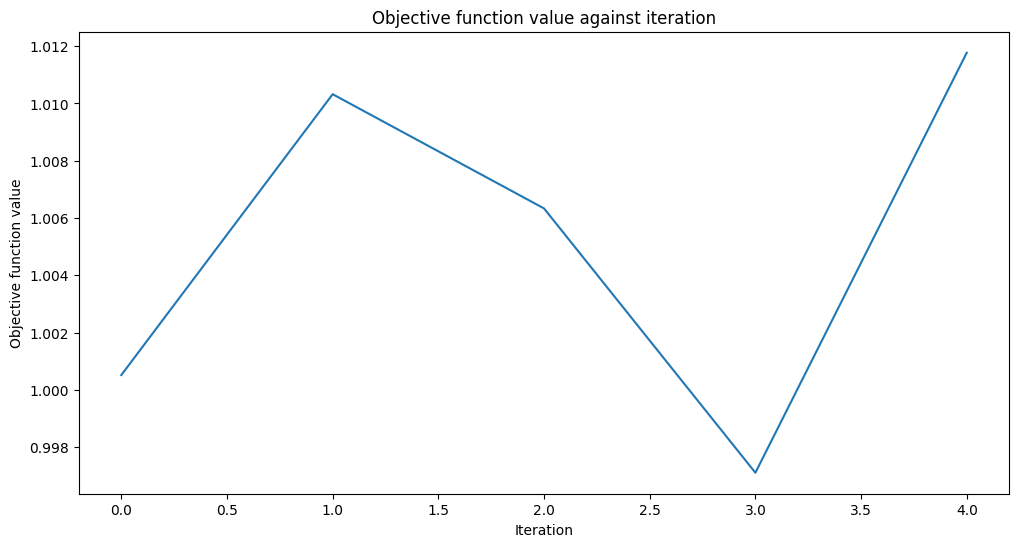

Training time: 512 seconds
Quantum VQC on the training dataset: 0.54
Quantum VQC on the test dataset:     0.52


In [22]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit.primitives import Sampler

import time
from qiskit_machine_learning.algorithms.classifiers import VQC

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

sampler = Sampler()

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
    quantum_instance=Aer.get_backend('qasm_simulator')
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc_model = vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")


In [24]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2951 sha256=d63a15c7e8fec2d7ffba9d36930ee5b62bd5c347874c6ed16e4d0cf7e48dc1a7
  Stored in directory: /home/jovyan/.cache/pip/wheels/5c/47/e1/386fa7740f1947ad87d16c68041c16ad8c23ca2bfd139a3fe5
Successfully built sklearn

[notice] A new release of pip available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [25]:
from sklearn import model_selection, datasets
import joblib
import pickle

In [26]:
 #a pickle file is created which contains the results from vqc.fit() 
filename = "vqc_model_NEW.joblib"
 joblib.dump(vqc_model, filename)

['vqc_model_NEW.joblib']

In [27]:
loaded_model = joblib.load(filename)

In [28]:
train_score_q4_new = loaded_model.score(train_features, train_labels)
test_score_q4_new = loaded_model.score(test_features, test_labels)

In [29]:
print(f"Quantum VQC on the training dataset: {train_score_q4_new:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4_new:.2f}")

Quantum VQC on the training dataset: 0.54
Quantum VQC on the test dataset:     0.52


In [31]:
# Measure the circuit and save the results to a CSV file
job = transpile(qc, backend)
results = []
for feature in features.values:
    counts = backend.run(job, shots=1, memory=True, qobj_id=str(feature)).result().get_memory()
    result = [int(bit) for bit in counts[0]]
    results.append(result)
    
output_df = pd.DataFrame(results, columns=['qubit_0', 'qubit_1', 'qubit_2', 'qubit_3','qubit_4'])
output_df.info()
output_df.head()
output_df.to_csv('vqc_results.csv', index=False) #this gives a dataset consisting of five features
#later using excel we added the target attribute 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   qubit_0  10314 non-null  int64
 1   qubit_1  10314 non-null  int64
 2   qubit_2  10314 non-null  int64
 3   qubit_3  10314 non-null  int64
 4   qubit_4  10314 non-null  int64
dtypes: int64(5)
memory usage: 403.0 KB


In [33]:
#prediction 
y_pred=vqc.predict(test_features)

In [34]:
print(y_pred)

[0 0 1 ... 1 0 0]


output_df.info()
output_df.head()
output_df.shape
print(output_df)

In [36]:
#Now using the final csv file we pass it to MLP to obtain the final results